In [79]:
import pandas as pd
import time
import hashlib
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("saida_json_cluster1.txt",sep=" ", header=None)
df.columns = ['time', 'data', 'blk_num', 'endossers', 'orderer','status']

In [53]:
time_dict = defaultdict(int)
orderer_dict = defaultdict(set)

for idx, row in df.loc[:,['time','orderer']].iterrows():
    t = time.strptime(row['time'][:19], "%Y-%m-%dT%H:%M:%S")
    key = int(time.mktime(t))
#     print( key, hashlib.md5(row['orderer'].encode()).hexdigest() )
    time_dict[key] += 1
    orderer_dict[key].add( hashlib.md5(row['orderer'].encode()).hexdigest() )
    

795 795


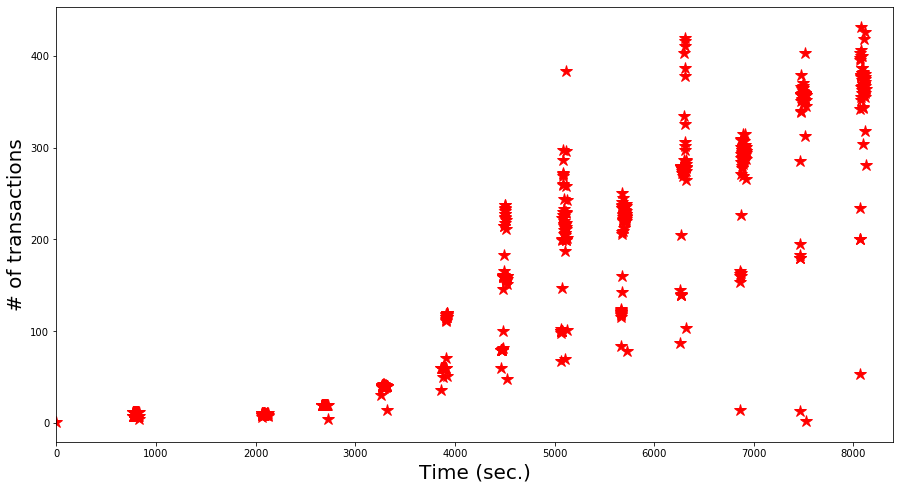

In [116]:
timet_list = []
trans_list = []
min_time = min(orderer_dict.keys())
for item in sorted(time_dict.items()):
#     print(int((item[0]-min_time)), item[1])
    timet_list.append(item[0]-min_time)
    trans_list.append(item[1])
print(len(time_list), len(trans_list))

outfile = "trans_per_sec_input.pdf"
x = timet_list
y = trans_list

fig,ax = plt.subplots(figsize =(15,8))
ax.set_xlabel('Time (sec.)', fontsize=20)
ax.set_ylabel('# of transactions', fontsize=20)

#ax.grid(linestyle='dotted')
ax.plot(x, y, 'ro', marker="*", linewidth=1, markersize=12)
ax.set_xlim(0, 8400)
tiks_list = [0*60, 20*60, 40*60, 60*60, 80*60, 100*60, 120*60, 140*60]
# ax.set_xticks(range(len(tiks_list)))
# ax.set_xticklabels( tiks_list, fontsize=18)
# plt.yticks([0, 100, 200, 300, 400, 500], fontsize=18)
# plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.savefig(outfile)
plt.show()

795 795


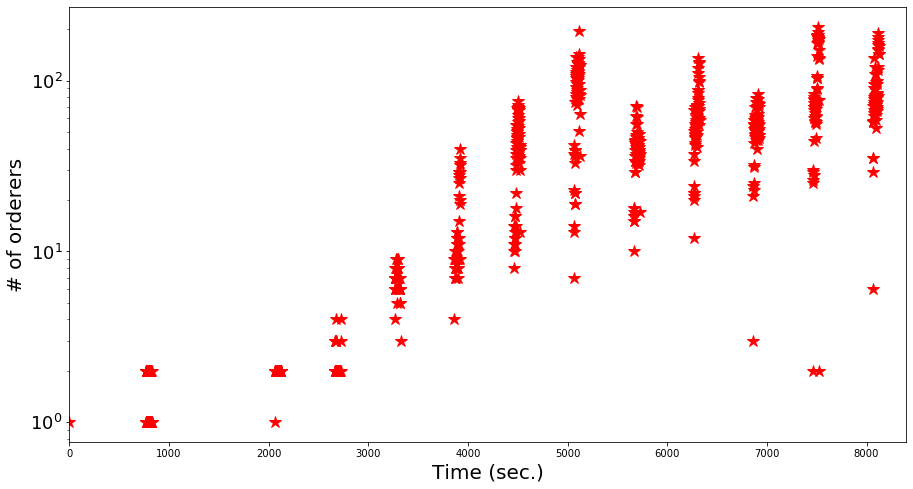

In [126]:
timeo_list = []
order_list = []
for item in sorted(orderer_dict.items()):
#     print(int((item[0]-min_time)/60), len(item[1]))
    timeo_list.append(item[0]-min_time)
    order_list.append(len(item[1]))
print(len(timeo_list), len(order_list))


outfile = "orderer_per_sec_input.pdf"
x = timeo_list
y = order_list

fig,ax = plt.subplots(figsize =(15,8))
ax.set_xlabel('Time (sec.)', fontsize=20)
ax.set_ylabel('# of orderers', fontsize=20)

ax.plot(x, y, 'ro', marker="*", linewidth=1, markersize=12)
ax.set_xlim(0, 8400)
tiks_list = [0*60, 20*60, 40*60, 60*60, 80*60, 100*60, 120*60, 140*60]
# ax.set_xticks(range(len(tiks_list)))
# ax.set_xticklabels( tiks_list, fontsize=18)
# ax.set_yticks(range(len([1, 10, 100, 1000])))
# ax.set_yticklabels( [1, 10, 100, 1000], fontsize=18)
# plt.yticks([1, 10, 100, 1000], fontsize=18)
# plt.legend(loc='upper left', fontsize=20, frameon=False)
plt.yscale('log')
plt.savefig(outfile)
plt.show()